# Workload analysis for the period 2016-2021
### Load libraries, data from ORMIS database and clean and filter data

In [1]:
suppressMessages(c(
    library(dplyr),
    library(ggplot2),
    library(tidyquant)
))
source('https://raw.githubusercontent.com/vxoli/R/master/Load%20%26%20Combine.r')
setwd('~/Downloads/data')
data <- CombineAll()
data$date = as.character(data$Operation.Date)
data$date = as.Date(data$Operation.Date,format = "%d-%b-%Y")
data$Month_Yr <- format(as.Date(data$date), "%Y-%m")

cts <- filter(data, data$Specialty.Desc == "CARDIO-THORACIC SURGERY")
cases <- cts %>% count(cts$Anaes.1.Name, cts$Month_Yr)

[1] "dplyr"                "stats"                "graphics"            
 [4] "grDevices"            "utils"                "datasets"            
 [7] "methods"              "base"                 "ggplot2"             
[10] "dplyr"                "stats"                "graphics"            
[13] "grDevices"            "utils"                "datasets"            
[16] "methods"              "base"                 "tidyquant"           
[19] "quantmod"             "TTR"                  "PerformanceAnalytics"
[22] "xts"                  "zoo"                  "lubridate"           
[25] "ggplot2"              "dplyr"                "stats"               
[28] "graphics"             "grDevices"            "utils"               
[31] "datasets"             "methods"              "base"

### Calculate the total number of CTS cases per month

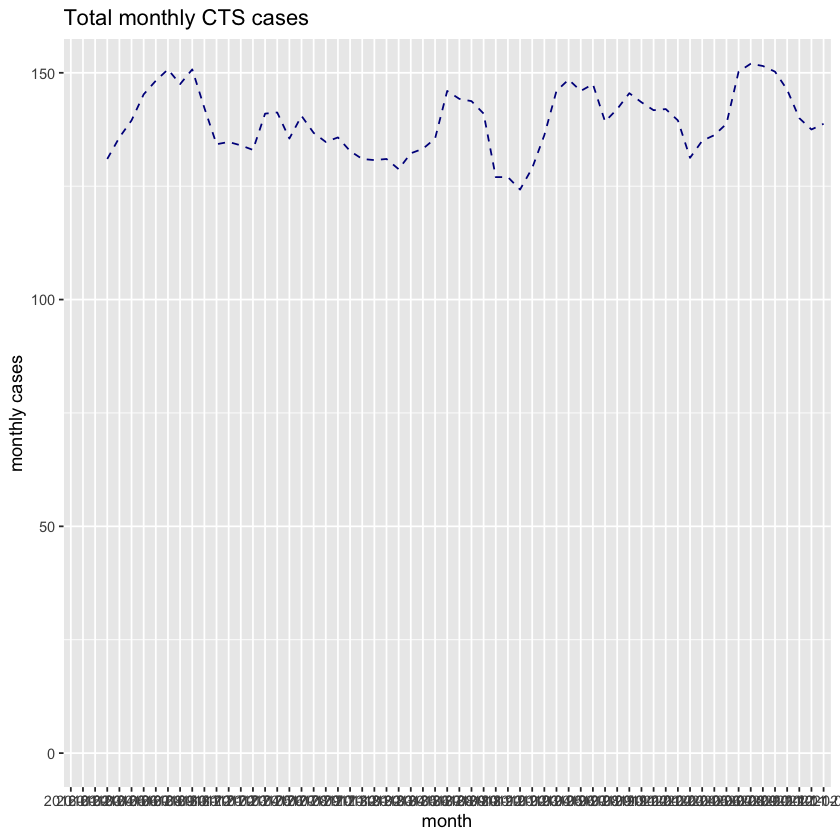

In [2]:
cts %>% count(cts$Specialty.Desc, cts$Month_Yr) %>% 
    ggplot(.,aes(x=.[,2], y=.[,3], group = 1)) + 
    geom_ma(ma_fun = SMA, n=4) + 
    labs(x="month", y="monthly cases", title="Total monthly CTS cases") + 
    coord_cartesian(ylim = c(0, 150))

Over the period the number of CTS cases remains fairly constant, fluctuating between 135 and 160 cases per month.
(Min 131, Mean 139, Max 170)

### Calulate and plot charts for individual anaesthetists

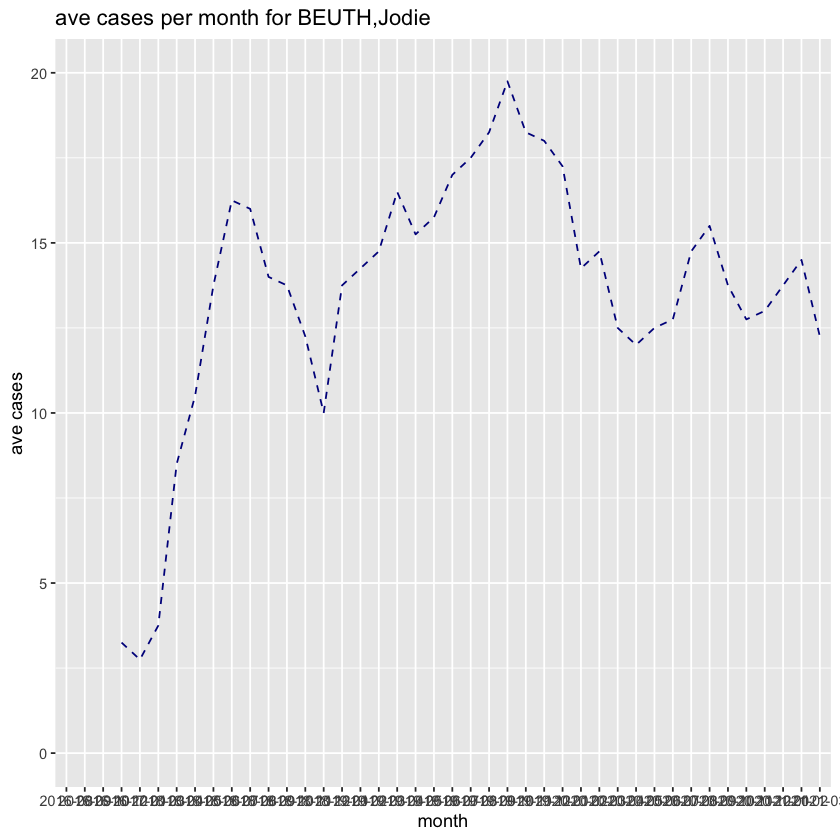

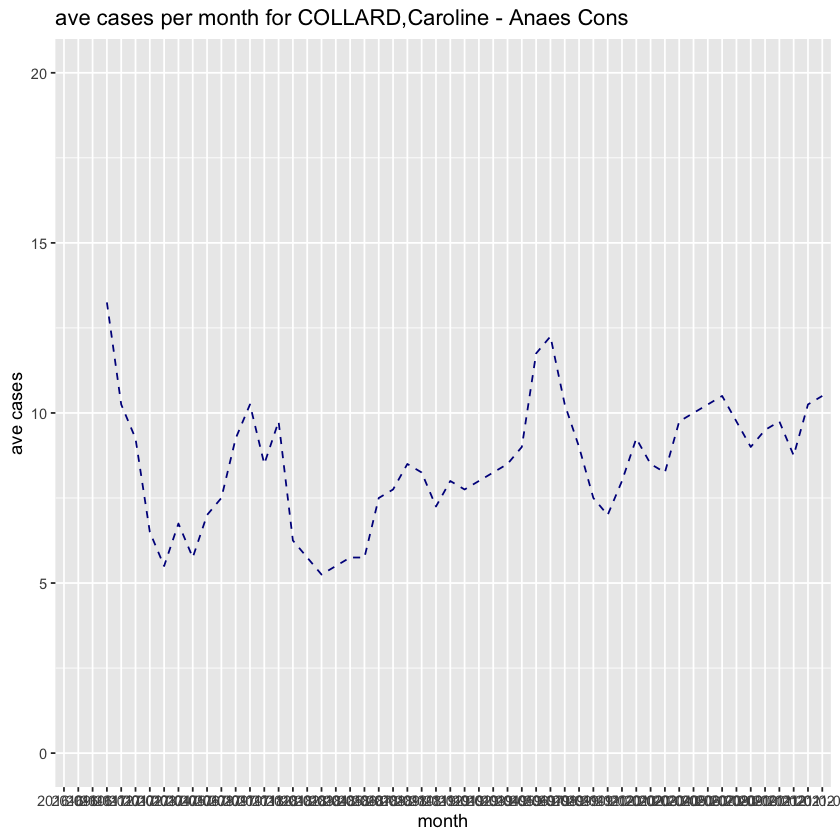

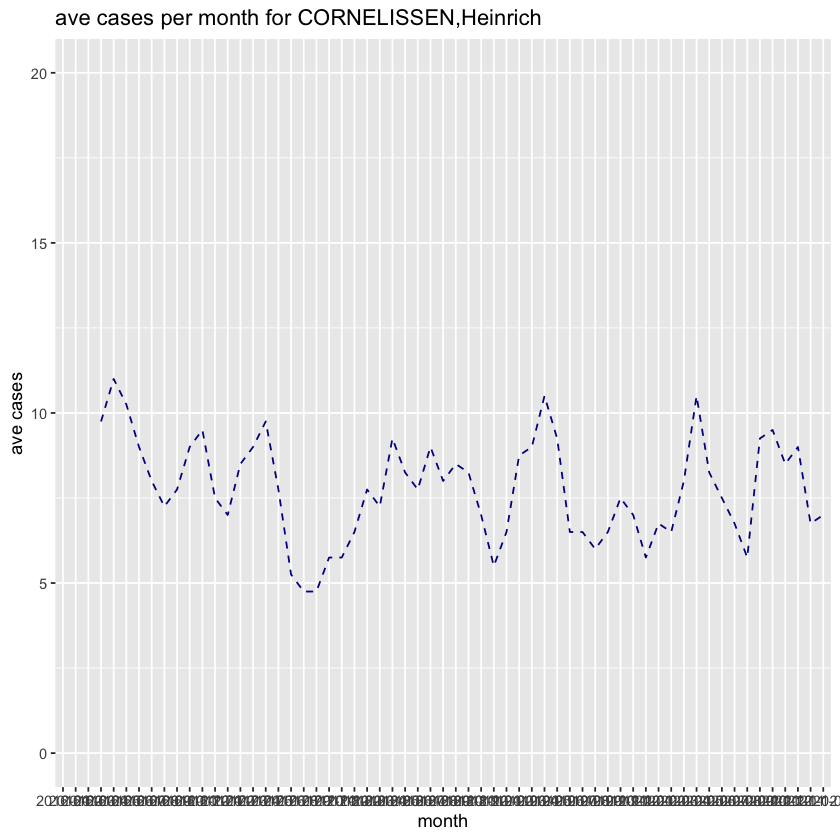

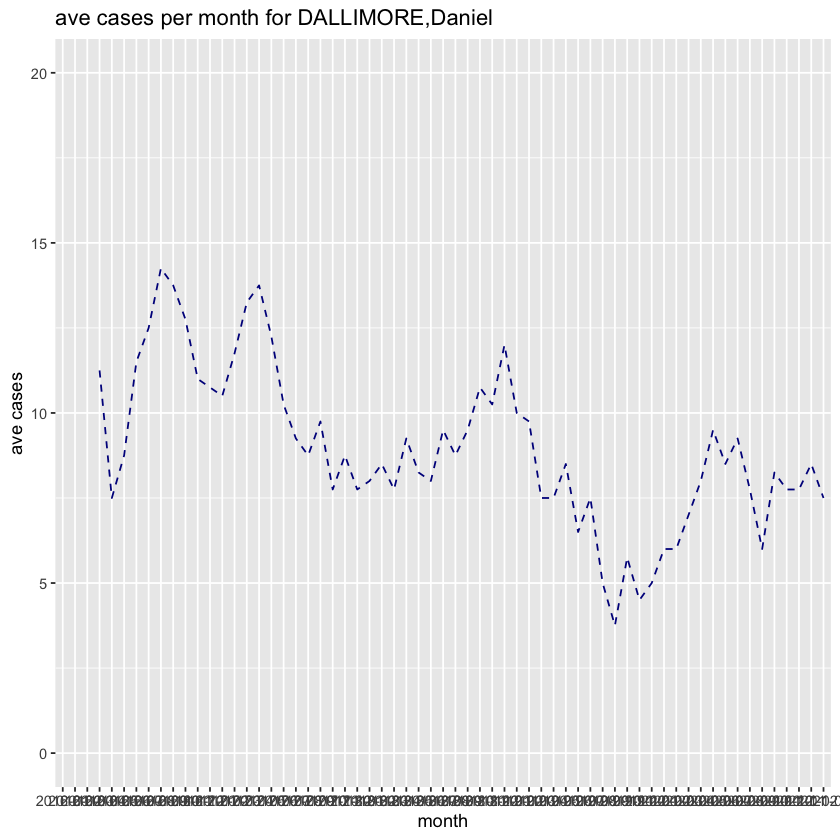

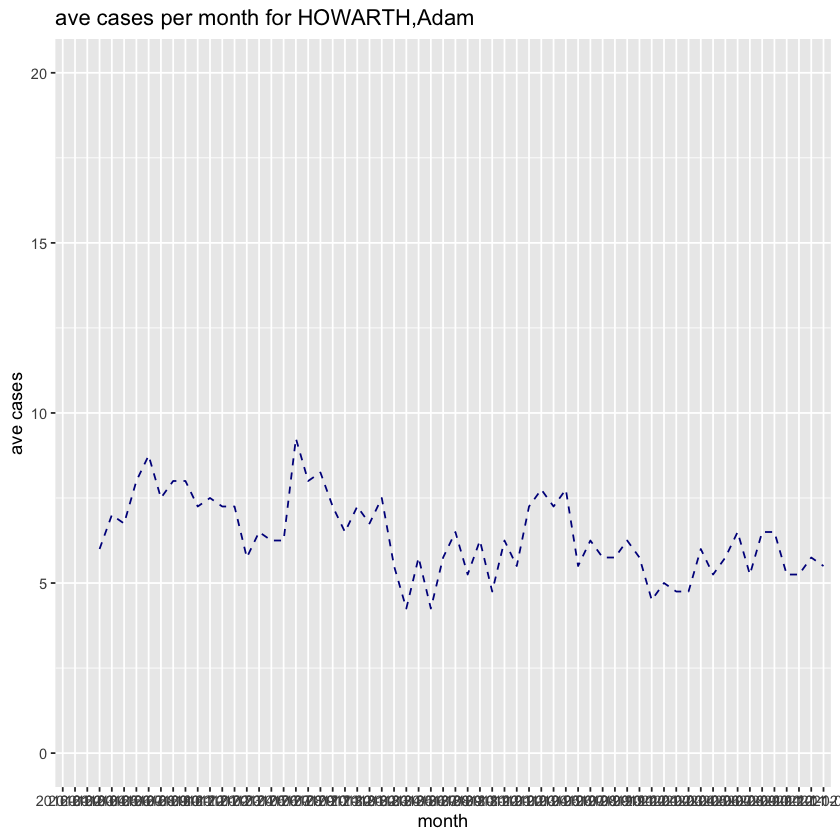

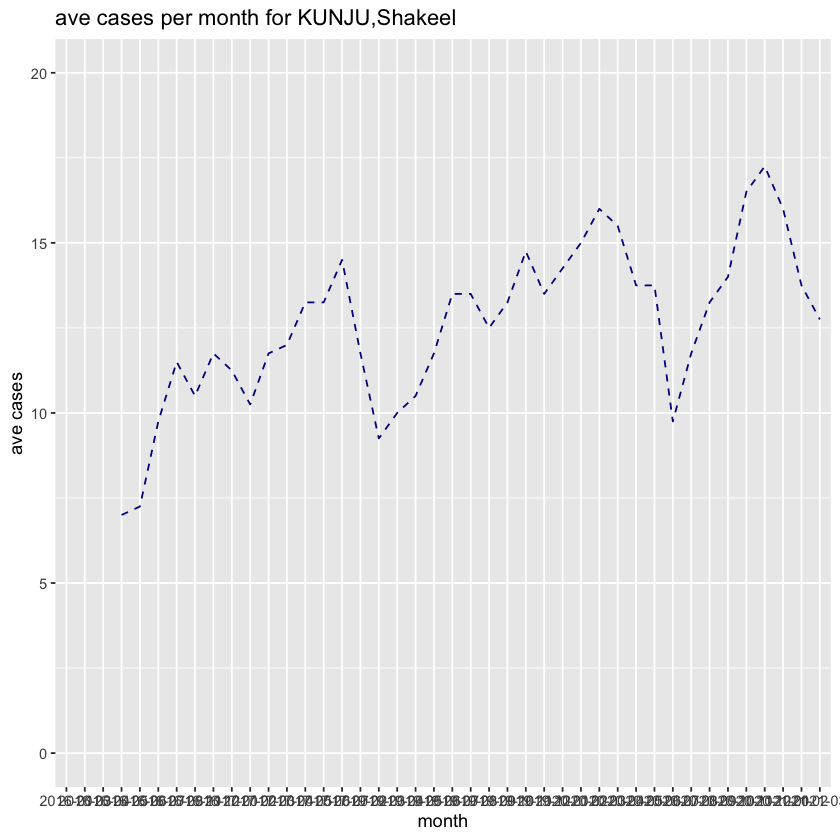

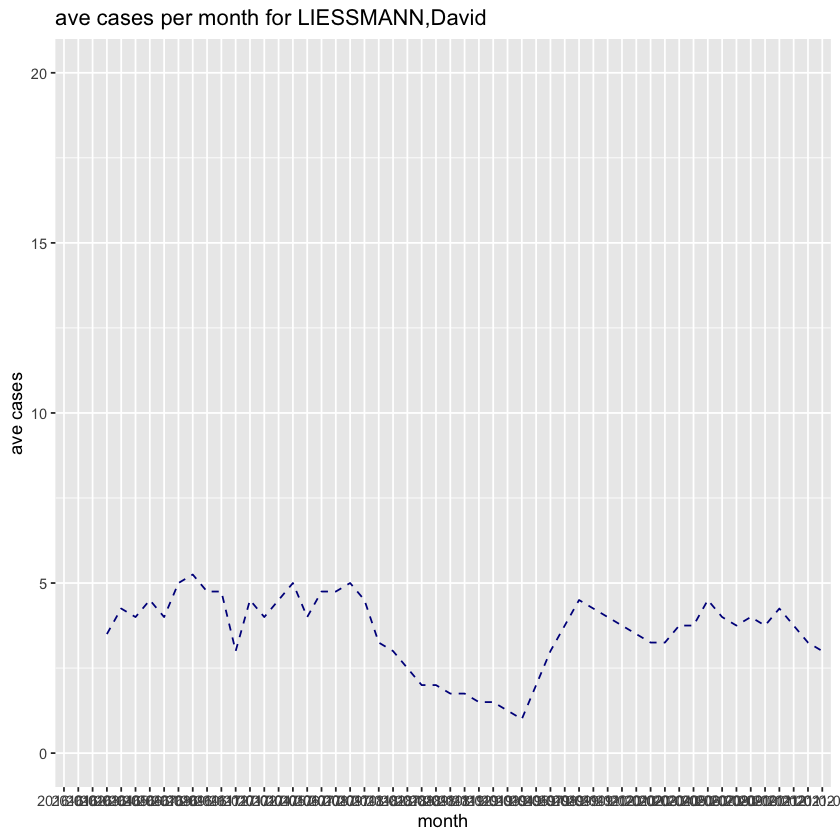

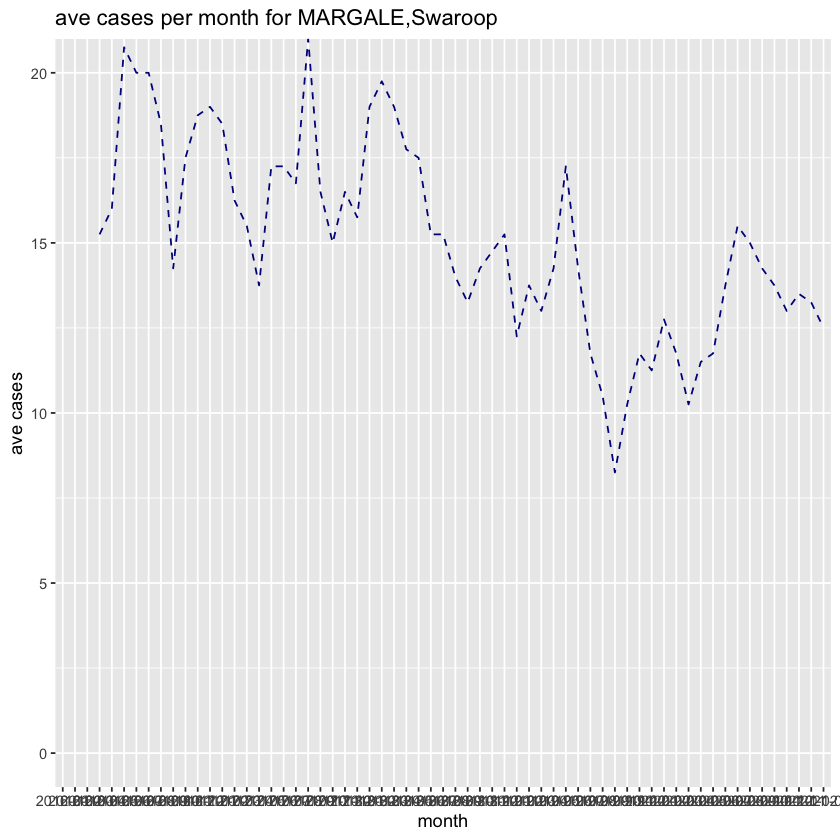

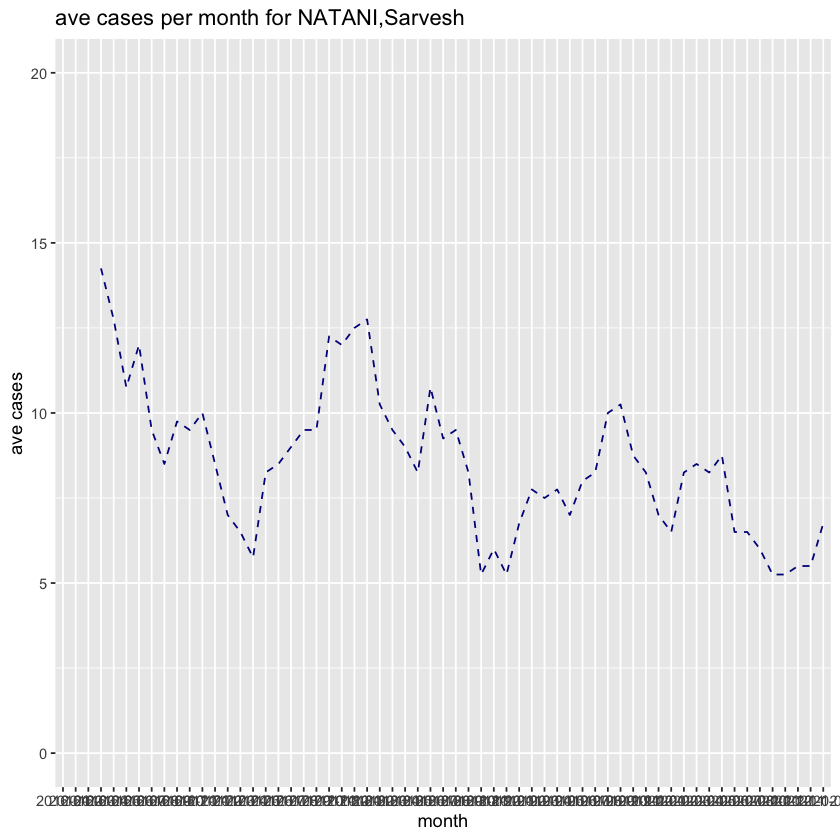

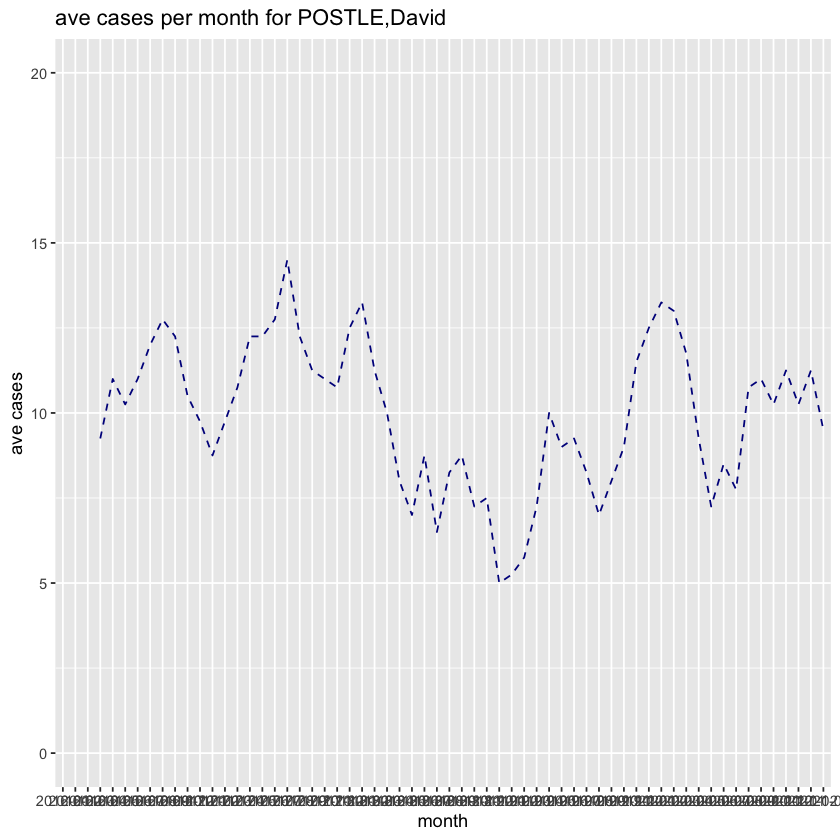

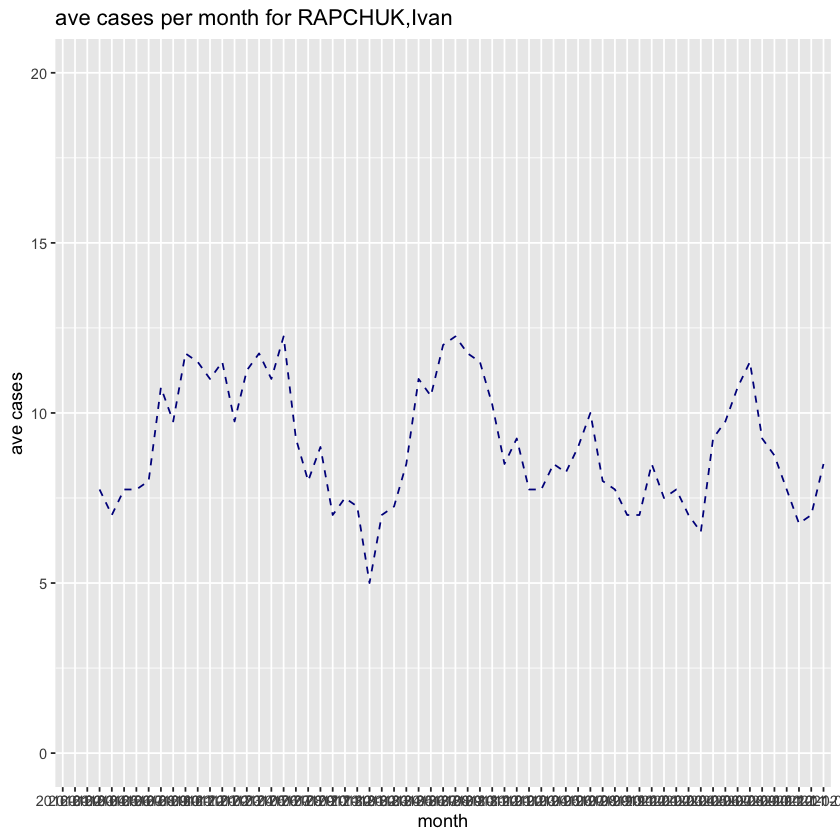

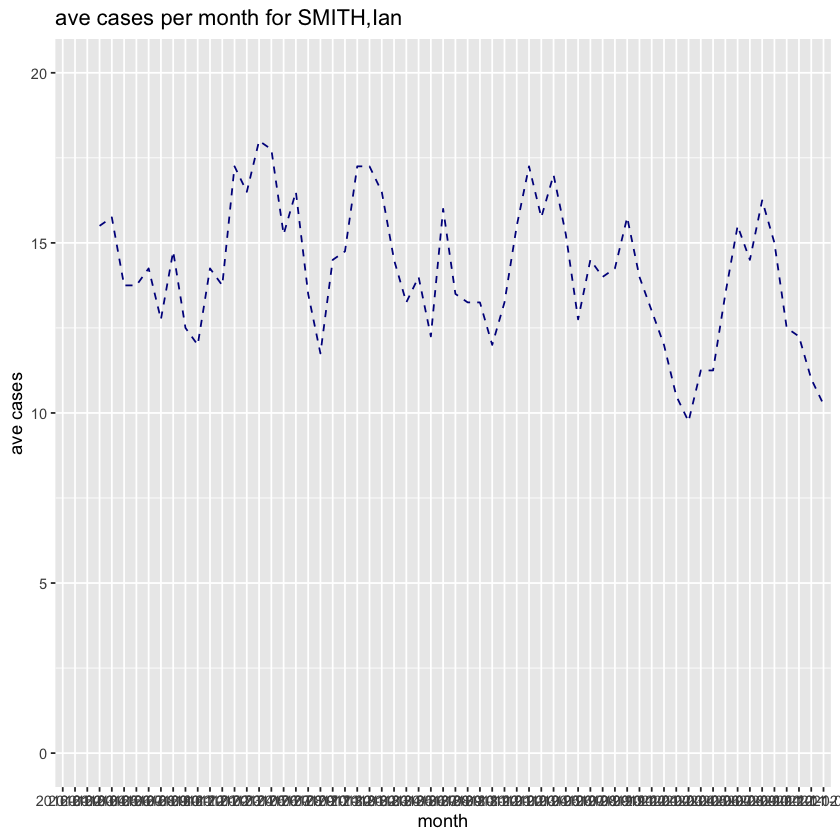

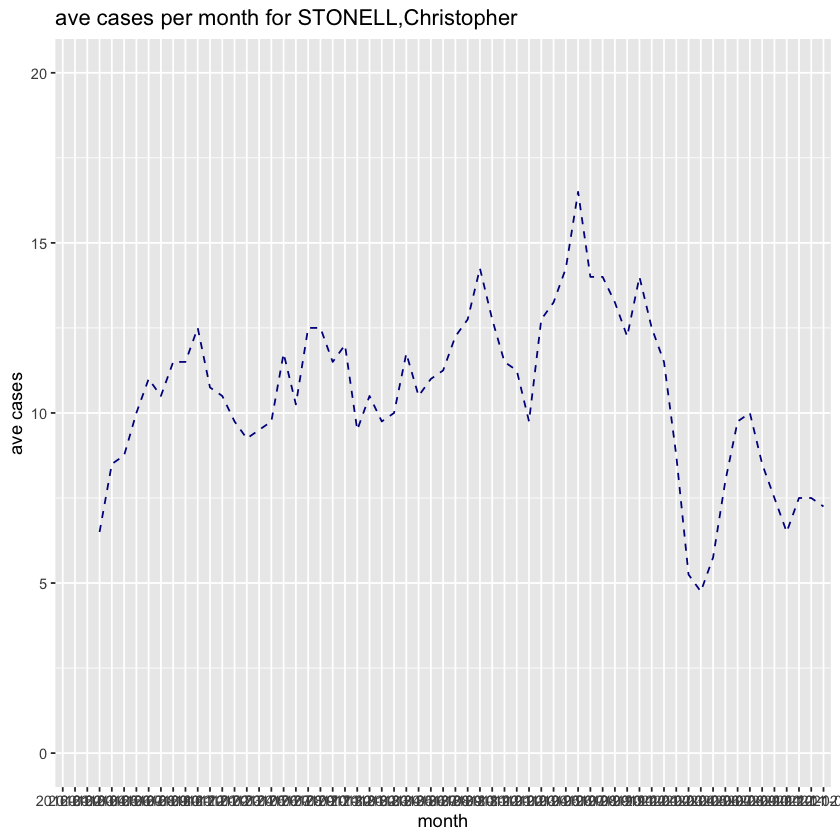

In [3]:
names <- c("BEUTH,Jodie", "COLLARD,Caroline - Anaes Cons", "CORNELISSEN,Heinrich", "DALLIMORE,Daniel", "HOWARTH,Adam", "KUNJU,Shakeel", "LIESSMANN,David", "MARGALE,Swaroop", "NATANI,Sarvesh", "POSTLE,David", "RAPCHUK,Ivan", "SMITH,Ian", "STONELL,Christopher")
for (name in names) {
print(
    filter(cases, cases[1] == name) %>% 
    ggplot(.,aes(x=.[,2], y=.[,3], group = 1)) + 
    geom_ma(ma_fun = SMA, n=4) + 
    labs(x="month", y="ave cases", title=paste("ave cases per month for ", name, sep="")) + 
    coord_cartesian(ylim = c(0, 20))    )
}


Use full time staff and VMO's who havent changed hours in last few years for comparisons to avoid difficulty of adjusting for FTE's or changes in job plans.